<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day4/transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer

- 2017/6に登場
- RNNを使わない
  - 必要なのはAttentionだけ
    - Attention=辞書オブジェクト
      - query(検索クエリ)に一致するkeyを索引し、対応するvalueを取り出す操作であると見做すことができる。\
    \-\>文長が長くなっても翻訳制度が落ちない
- 当時のSOTAをはるかに少ない計算量で実現
  - 英仏(3600万分)の学習を8GPUで3.5日で完了

## Transformer主要モジュール

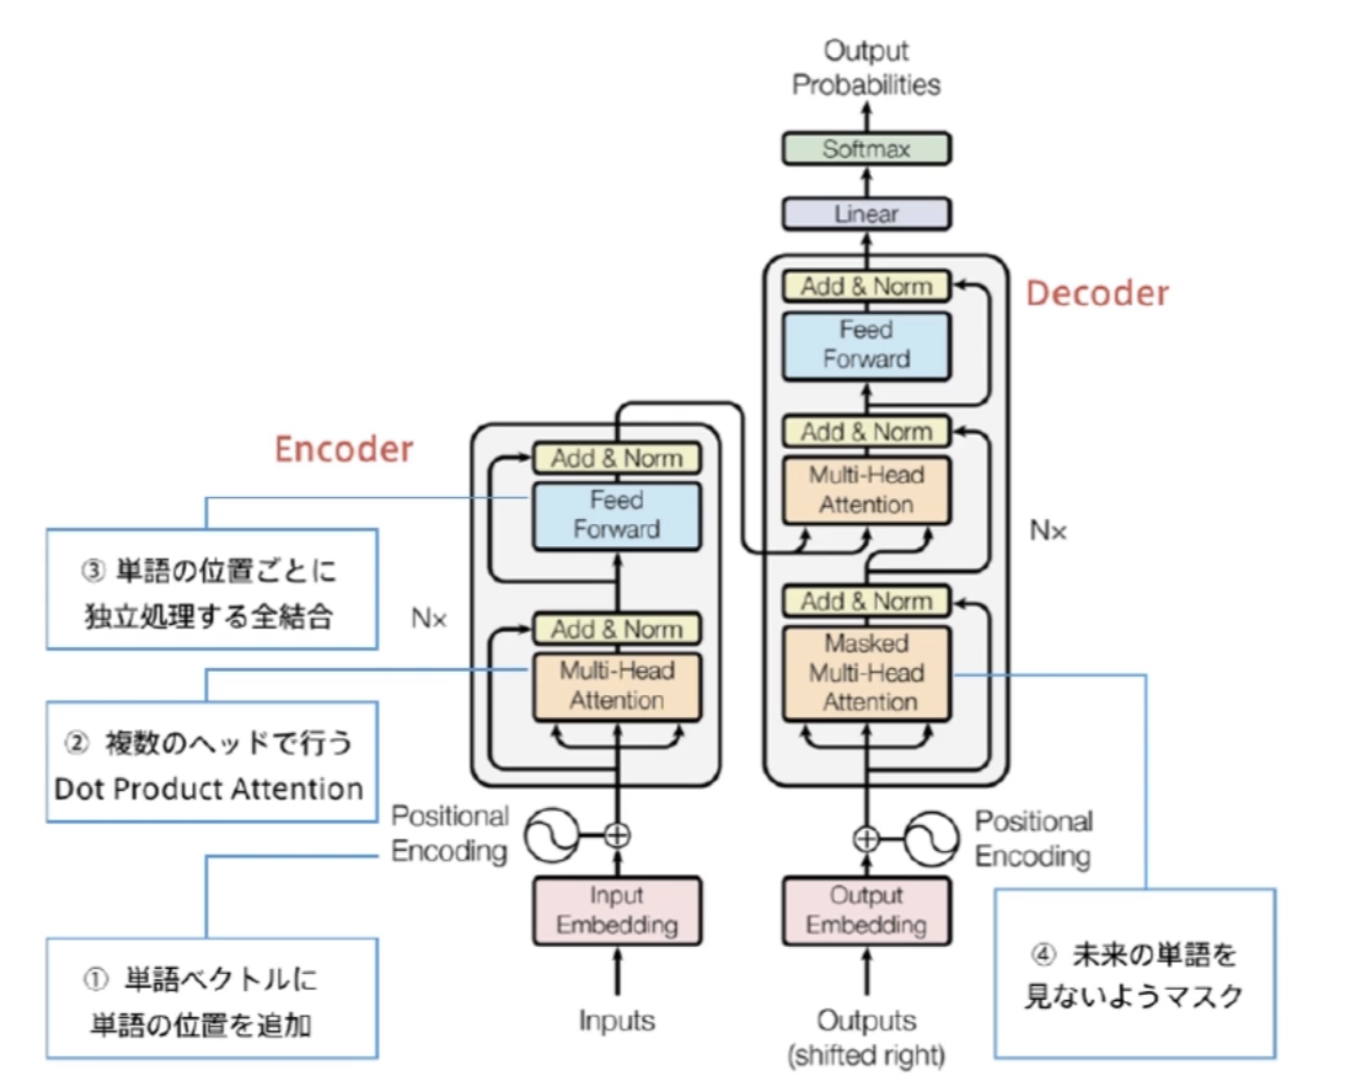

## Attentionの種類

$
softmax(Q,K^T)V\\
\sigma(Query,Key)Value
$
以下の種類の注意機構がある。
- Source Target Attention
  - Target: Query
  - Source: Key, Value
- Selft-Attention
  - Source: Query, Key, Value

Selft-Attentionを使う\
->入力全て同じにして学習的に注意箇所を決める

## Position-Wise Feed-Forward Networks

位置情報を保持したまま順伝播させる

- 各Attention層の出力を決定
  - 2層の全結合NN
  - 線形変換->ReLu->線形変換

$$
FFN(x)=max(0,xW_1+b_1)W_2+b_2\\
W_1\in\mathbb{R}^{512*2048}\\
W_2\in\mathbb{R}^{2048*512}\\
b_1\in\mathbb{R}^{2048}\\
b_2\in\mathbb{R}^{512}
$$

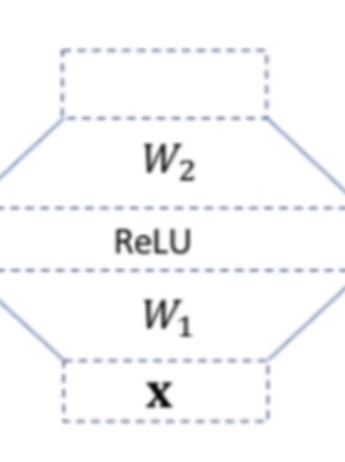

## Scaled Dot-Product Attention

全単語に関するAttentionをまとめて計算する
$$
Attention(Q,K,V)=softmax\left(\frac{QK^T}{\sqrt{d_k}}\right)
$$

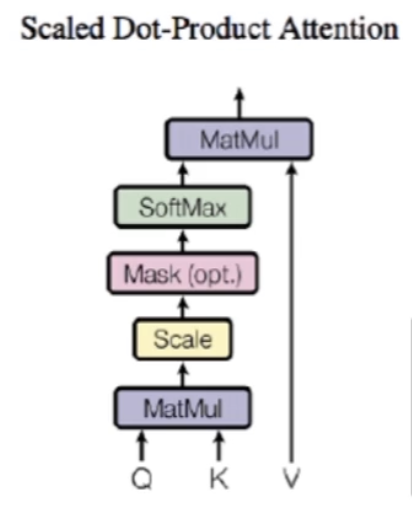

## Multi-Head attention

重みパラメータの異なる8個のヘッドを使用
- 8個のScaled Dot-Product Attention
- それぞれのヘッドが異なる種類の情報を収集

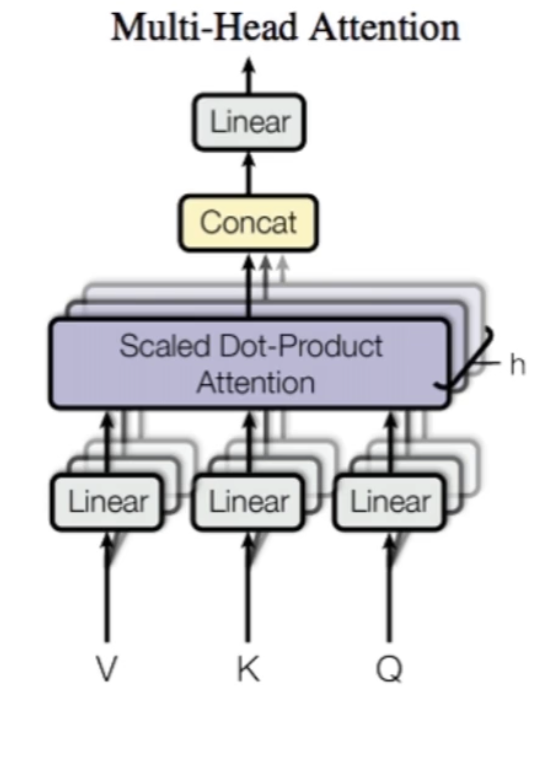

# Add & Norm

- Add(Residual Connection)
  - 入出力の差分を学習させる
  - 実装上は出力に入力をそのまま加算するだけ
  - 効果: 学習・テストエラーの低減
- Norm(Layer Normalization)
  - 各層においてバイアスを除く活性化関数への入力を平均0、分散1に正則化
  - 効果: 学習の高速化


## Position Encoding

- 単語の位置情報をエンコード
$$
PE_{(pos,2i)}=sin\left(\frac{pos}{10000^{2i/512}}\right)\\
PE_{(pos,2i+1)}=cos\left(\frac{pos}{10000^{2i/512}}\right)
$$
- posの(ソフトな)2進数表現

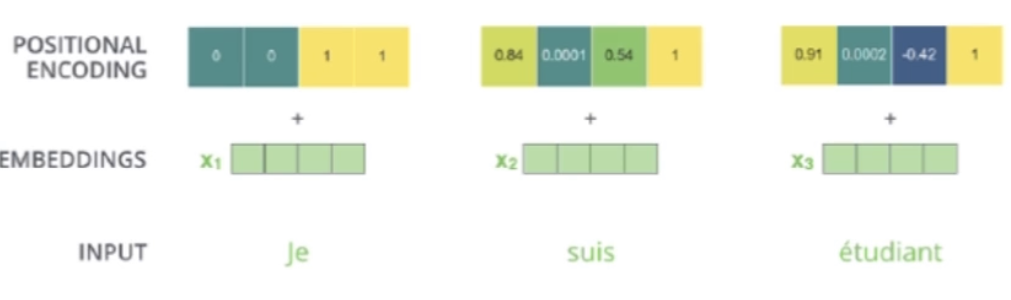